  PossibleOrientations  waterMolecule  dotProduct
0             set_1111       3.048902   -0.465309
1             set_1121       2.594327   -7.233549
2             set_1131       2.590671   -7.203426
3             set_1211       2.594919   -7.649348
4             set_1221       2.578404   -7.021329


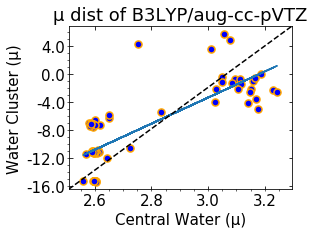

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as tck
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from numpy.polynomial.polynomial import polyfit
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# Read in data and examine first 10 rows
df = pd.read_excel("pVTZ.xlsx")
# print(df)
print(df.head())
molecule = df['waterMolecule']
cluster = df['dotProduct']

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

# Fit with polyfit
b, m = polyfit(molecule, cluster, 1)    # y = mx + b (line of best fit)
#ax.scatter(waterMolecule, waterCluster, marker='o',
#        markersize='8', markerfacecolor='blue',markeredgewidth='2', markeredgecolor='orange')
ax.scatter(molecule, cluster, c='blue', marker='o', edgecolor='orange', s=50, linewidths = 1.5)
ax.plot(molecule, b + m * molecule, '-')

plt.ylabel('Water Cluster (μ)', fontsize = 15)
plt.xlabel('Central Water (μ)', fontsize = 15)
plt.title('μ dist of B3LYP/aug-cc-pVTZ', fontsize = 18)

# y-axis set-up
#plt.ylim(0, 8)   # to manage x-axis, plt.xlim(3, 10)
ax.yaxis.set_major_locator(MultipleLocator(4))
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
# For the minor ticks, use no labels; default NullFormatter.
ax.yaxis.set_minor_locator(MultipleLocator(1))

# x-axis set-up
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(0.05))

line = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='--')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

# Tick Parameters
plt.tick_params(axis='both', left='on', top='on', right='on',
                    bottom='on', labelleft='on', labeltop='off',
                    labelright='off', labelbottom='on', direction = 'in', which='major', labelsize=15)

# saving figure
plt.savefig("dipoleMoment_dist_pVTZ.png", bbox_inches="tight", dpi = 500)
plt.show()